<a href="https://colab.research.google.com/github/conker84/gc-2k22-spark/blob/main/neo4j_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leveraging Neo4j with Apache Spark

## Environment Configuration

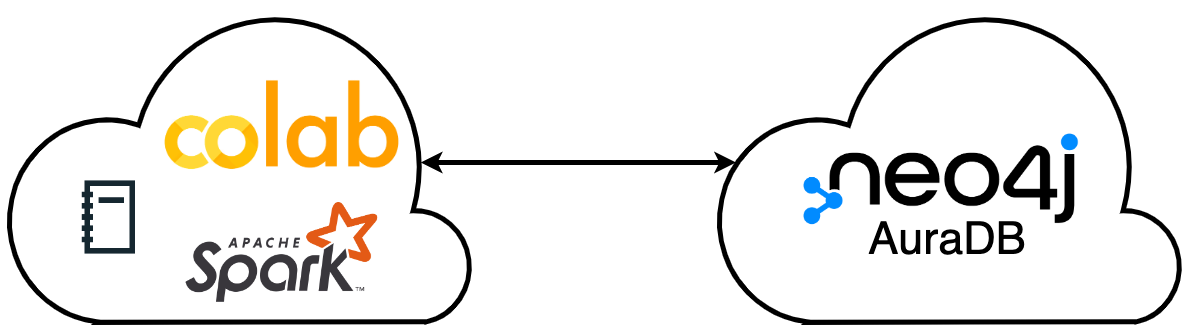



### Configure an Aura instance

<center>
Neo4j Aura is a fully managed cloud service: The zero-admin, always-on graph database for cloud developers.

Create a [free instance](https://console.neo4j.io/?ref=aura-lp&mpp=4bfb2414ab973c741b6f067bf06d5575&mpid=17f40ce03ac883-0f09bb214466c1-37677109-1ea000-17f40ce03ad975&_gl=1*ql4f6s*_ga*MTc2OTMwNjEwMy4xNjQ5NDI3MDE0*_ga_DL38Q8KGQC*MTY1MzQxMDQzMC43OS4xLjE2NTM0MTA3MjQuMA..&_ga=2.136543024.1659283742.1653295079-1769306103.1649427014&_gac=1.216269284.1653306922.CjwKCAjw4ayUBhA4EiwATWyBrl6dN0oaH9_btCfvzdhi77ieNP07GAkOYuz7wx9QEewBnG_FUIMg8xoCgLsQAvD_BwE) 

</center>

#### Populate the database

To perform this section go in the Neo4j Brower of your aura instance and paste the following query:

```cypher
CREATE (TheMatrix:Movie {title:'The Matrix', released:1999, tagline:'Welcome to the Real World'})
CREATE (Keanu:Person {name:'Keanu Reeves', born:1964})
CREATE (Carrie:Person {name:'Carrie-Anne Moss', born:1967})
CREATE (Laurence:Person {name:'Laurence Fishburne', born:1961})
CREATE (Hugo:Person {name:'Hugo Weaving', born:1960})
CREATE (LillyW:Person {name:'Lilly Wachowski', born:1967})
CREATE (LanaW:Person {name:'Lana Wachowski', born:1965})
CREATE (JoelS:Person {name:'Joel Silver', born:1952})
CREATE
(Keanu)-[:ACTED_IN {roles:['Neo']}]->(TheMatrix),
(Carrie)-[:ACTED_IN {roles:['Trinity']}]->(TheMatrix),
(Laurence)-[:ACTED_IN {roles:['Morpheus']}]->(TheMatrix),
(Hugo)-[:ACTED_IN {roles:['Agent Smith']}]->(TheMatrix),
(LillyW)-[:DIRECTED]->(TheMatrix),
(LanaW)-[:DIRECTED]->(TheMatrix),
(JoelS)-[:PRODUCED]->(TheMatrix)

CREATE (Emil:Person {name:"Emil Eifrem", born:1978})
CREATE (Emil)-[:ACTED_IN {roles:["Emil"]}]->(TheMatrix)

CREATE (TheMatrixReloaded:Movie {title:'The Matrix Reloaded', released:2003, tagline:'Free your mind'})
CREATE
(Keanu)-[:ACTED_IN {roles:['Neo']}]->(TheMatrixReloaded),
(Carrie)-[:ACTED_IN {roles:['Trinity']}]->(TheMatrixReloaded),
(Laurence)-[:ACTED_IN {roles:['Morpheus']}]->(TheMatrixReloaded),
(Hugo)-[:ACTED_IN {roles:['Agent Smith']}]->(TheMatrixReloaded),
(LillyW)-[:DIRECTED]->(TheMatrixReloaded),
(LanaW)-[:DIRECTED]->(TheMatrixReloaded),
(JoelS)-[:PRODUCED]->(TheMatrixReloaded)

CREATE (TheMatrixRevolutions:Movie {title:'The Matrix Revolutions', released:2003, tagline:'Everything that has a beginning has an end'})
CREATE
(Keanu)-[:ACTED_IN {roles:['Neo']}]->(TheMatrixRevolutions),
(Carrie)-[:ACTED_IN {roles:['Trinity']}]->(TheMatrixRevolutions),
(Laurence)-[:ACTED_IN {roles:['Morpheus']}]->(TheMatrixRevolutions),
(Hugo)-[:ACTED_IN {roles:['Agent Smith']}]->(TheMatrixRevolutions),
(LillyW)-[:DIRECTED]->(TheMatrixRevolutions),
(LanaW)-[:DIRECTED]->(TheMatrixRevolutions),
(JoelS)-[:PRODUCED]->(TheMatrixRevolutions)

CREATE (TheDevilsAdvocate:Movie {title:"The Devil's Advocate", released:1997, tagline:'Evil has its winning ways'})
CREATE (Charlize:Person {name:'Charlize Theron', born:1975})
CREATE (Al:Person {name:'Al Pacino', born:1940})
CREATE (Taylor:Person {name:'Taylor Hackford', born:1944})
CREATE
(Keanu)-[:ACTED_IN {roles:['Kevin Lomax']}]->(TheDevilsAdvocate),
(Charlize)-[:ACTED_IN {roles:['Mary Ann Lomax']}]->(TheDevilsAdvocate),
(Al)-[:ACTED_IN {roles:['John Milton']}]->(TheDevilsAdvocate),
(Taylor)-[:DIRECTED]->(TheDevilsAdvocate)

CREATE (AFewGoodMen:Movie {title:"A Few Good Men", released:1992, tagline:"In the heart of the nation's capital, in a courthouse of the U.S. government, one man will stop at nothing to keep his honor, and one will stop at nothing to find the truth."})
CREATE (TomC:Person {name:'Tom Cruise', born:1962})
CREATE (JackN:Person {name:'Jack Nicholson', born:1937})
CREATE (DemiM:Person {name:'Demi Moore', born:1962})
CREATE (KevinB:Person {name:'Kevin Bacon', born:1958})
CREATE (KieferS:Person {name:'Kiefer Sutherland', born:1966})
CREATE (NoahW:Person {name:'Noah Wyle', born:1971})
CREATE (CubaG:Person {name:'Cuba Gooding Jr.', born:1968})
CREATE (KevinP:Person {name:'Kevin Pollak', born:1957})
CREATE (JTW:Person {name:'J.T. Walsh', born:1943})
CREATE (JamesM:Person {name:'James Marshall', born:1967})
CREATE (ChristopherG:Person {name:'Christopher Guest', born:1948})
CREATE (RobR:Person {name:'Rob Reiner', born:1947})
CREATE (AaronS:Person {name:'Aaron Sorkin', born:1961})
CREATE
(TomC)-[:ACTED_IN {roles:['Lt. Daniel Kaffee']}]->(AFewGoodMen),
(JackN)-[:ACTED_IN {roles:['Col. Nathan R. Jessup']}]->(AFewGoodMen),
(DemiM)-[:ACTED_IN {roles:['Lt. Cdr. JoAnne Galloway']}]->(AFewGoodMen),
(KevinB)-[:ACTED_IN {roles:['Capt. Jack Ross']}]->(AFewGoodMen),
(KieferS)-[:ACTED_IN {roles:['Lt. Jonathan Kendrick']}]->(AFewGoodMen),
(NoahW)-[:ACTED_IN {roles:['Cpl. Jeffrey Barnes']}]->(AFewGoodMen),
(CubaG)-[:ACTED_IN {roles:['Cpl. Carl Hammaker']}]->(AFewGoodMen),
(KevinP)-[:ACTED_IN {roles:['Lt. Sam Weinberg']}]->(AFewGoodMen),
(JTW)-[:ACTED_IN {roles:['Lt. Col. Matthew Andrew Markinson']}]->(AFewGoodMen),
(JamesM)-[:ACTED_IN {roles:['Pfc. Louden Downey']}]->(AFewGoodMen),
(ChristopherG)-[:ACTED_IN {roles:['Dr. Stone']}]->(AFewGoodMen),
(AaronS)-[:ACTED_IN {roles:['Man in Bar']}]->(AFewGoodMen),
(RobR)-[:DIRECTED]->(AFewGoodMen),
(AaronS)-[:WROTE]->(AFewGoodMen)

CREATE (TopGun:Movie {title:"Top Gun", released:1986, tagline:'I feel the need, the need for speed.'})
CREATE (KellyM:Person {name:'Kelly McGillis', born:1957})
CREATE (ValK:Person {name:'Val Kilmer', born:1959})
CREATE (AnthonyE:Person {name:'Anthony Edwards', born:1962})
CREATE (TomS:Person {name:'Tom Skerritt', born:1933})
CREATE (MegR:Person {name:'Meg Ryan', born:1961})
CREATE (TonyS:Person {name:'Tony Scott', born:1944})
CREATE (JimC:Person {name:'Jim Cash', born:1941})
CREATE
(TomC)-[:ACTED_IN {roles:['Maverick']}]->(TopGun),
(KellyM)-[:ACTED_IN {roles:['Charlie']}]->(TopGun),
(ValK)-[:ACTED_IN {roles:['Iceman']}]->(TopGun),
(AnthonyE)-[:ACTED_IN {roles:['Goose']}]->(TopGun),
(TomS)-[:ACTED_IN {roles:['Viper']}]->(TopGun),
(MegR)-[:ACTED_IN {roles:['Carole']}]->(TopGun),
(TonyS)-[:DIRECTED]->(TopGun),
(JimC)-[:WROTE]->(TopGun)

CREATE (JerryMaguire:Movie {title:'Jerry Maguire', released:2000, tagline:'The rest of his life begins now.'})
CREATE (ReneeZ:Person {name:'Renee Zellweger', born:1969})
CREATE (KellyP:Person {name:'Kelly Preston', born:1962})
CREATE (JerryO:Person {name:"Jerry O'Connell", born:1974})
CREATE (JayM:Person {name:'Jay Mohr', born:1970})
CREATE (BonnieH:Person {name:'Bonnie Hunt', born:1961})
CREATE (ReginaK:Person {name:'Regina King', born:1971})
CREATE (JonathanL:Person {name:'Jonathan Lipnicki', born:1996})
CREATE (CameronC:Person {name:'Cameron Crowe', born:1957})
CREATE
(TomC)-[:ACTED_IN {roles:['Jerry Maguire']}]->(JerryMaguire),
(CubaG)-[:ACTED_IN {roles:['Rod Tidwell']}]->(JerryMaguire),
(ReneeZ)-[:ACTED_IN {roles:['Dorothy Boyd']}]->(JerryMaguire),
(KellyP)-[:ACTED_IN {roles:['Avery Bishop']}]->(JerryMaguire),
(JerryO)-[:ACTED_IN {roles:['Frank Cushman']}]->(JerryMaguire),
(JayM)-[:ACTED_IN {roles:['Bob Sugar']}]->(JerryMaguire),
(BonnieH)-[:ACTED_IN {roles:['Laurel Boyd']}]->(JerryMaguire),
(ReginaK)-[:ACTED_IN {roles:['Marcee Tidwell']}]->(JerryMaguire),
(JonathanL)-[:ACTED_IN {roles:['Ray Boyd']}]->(JerryMaguire),
(CameronC)-[:DIRECTED]->(JerryMaguire),
(CameronC)-[:PRODUCED]->(JerryMaguire),
(CameronC)-[:WROTE]->(JerryMaguire)

CREATE (StandByMe:Movie {title:"Stand By Me", released:1986, tagline:"For some, it's the last real taste of innocence, and the first real taste of life. But for everyone, it's the time that memories are made of."})
CREATE (RiverP:Person {name:'River Phoenix', born:1970})
CREATE (CoreyF:Person {name:'Corey Feldman', born:1971})
CREATE (WilW:Person {name:'Wil Wheaton', born:1972})
CREATE (JohnC:Person {name:'John Cusack', born:1966})
CREATE (MarshallB:Person {name:'Marshall Bell', born:1942})
CREATE
(WilW)-[:ACTED_IN {roles:['Gordie Lachance']}]->(StandByMe),
(RiverP)-[:ACTED_IN {roles:['Chris Chambers']}]->(StandByMe),
(JerryO)-[:ACTED_IN {roles:['Vern Tessio']}]->(StandByMe),
(CoreyF)-[:ACTED_IN {roles:['Teddy Duchamp']}]->(StandByMe),
(JohnC)-[:ACTED_IN {roles:['Denny Lachance']}]->(StandByMe),
(KieferS)-[:ACTED_IN {roles:['Ace Merrill']}]->(StandByMe),
(MarshallB)-[:ACTED_IN {roles:['Mr. Lachance']}]->(StandByMe),
(RobR)-[:DIRECTED]->(StandByMe)

CREATE (AsGoodAsItGets:Movie {title:'As Good as It Gets', released:1997, tagline:'A comedy from the heart that goes for the throat.'})
CREATE (HelenH:Person {name:'Helen Hunt', born:1963})
CREATE (GregK:Person {name:'Greg Kinnear', born:1963})
CREATE (JamesB:Person {name:'James L. Brooks', born:1940})
CREATE
(JackN)-[:ACTED_IN {roles:['Melvin Udall']}]->(AsGoodAsItGets),
(HelenH)-[:ACTED_IN {roles:['Carol Connelly']}]->(AsGoodAsItGets),
(GregK)-[:ACTED_IN {roles:['Simon Bishop']}]->(AsGoodAsItGets),
(CubaG)-[:ACTED_IN {roles:['Frank Sachs']}]->(AsGoodAsItGets),
(JamesB)-[:DIRECTED]->(AsGoodAsItGets)

CREATE (WhatDreamsMayCome:Movie {title:'What Dreams May Come', released:1998, tagline:'After life there is more. The end is just the beginning.'})
CREATE (AnnabellaS:Person {name:'Annabella Sciorra', born:1960})
CREATE (MaxS:Person {name:'Max von Sydow', born:1929})
CREATE (WernerH:Person {name:'Werner Herzog', born:1942})
CREATE (Robin:Person {name:'Robin Williams', born:1951})
CREATE (VincentW:Person {name:'Vincent Ward', born:1956})
CREATE
(Robin)-[:ACTED_IN {roles:['Chris Nielsen']}]->(WhatDreamsMayCome),
(CubaG)-[:ACTED_IN {roles:['Albert Lewis']}]->(WhatDreamsMayCome),
(AnnabellaS)-[:ACTED_IN {roles:['Annie Collins-Nielsen']}]->(WhatDreamsMayCome),
(MaxS)-[:ACTED_IN {roles:['The Tracker']}]->(WhatDreamsMayCome),
(WernerH)-[:ACTED_IN {roles:['The Face']}]->(WhatDreamsMayCome),
(VincentW)-[:DIRECTED]->(WhatDreamsMayCome)

CREATE (SnowFallingonCedars:Movie {title:'Snow Falling on Cedars', released:1999, tagline:'First loves last. Forever.'})
CREATE (EthanH:Person {name:'Ethan Hawke', born:1970})
CREATE (RickY:Person {name:'Rick Yune', born:1971})
CREATE (JamesC:Person {name:'James Cromwell', born:1940})
CREATE (ScottH:Person {name:'Scott Hicks', born:1953})
CREATE
(EthanH)-[:ACTED_IN {roles:['Ishmael Chambers']}]->(SnowFallingonCedars),
(RickY)-[:ACTED_IN {roles:['Kazuo Miyamoto']}]->(SnowFallingonCedars),
(MaxS)-[:ACTED_IN {roles:['Nels Gudmundsson']}]->(SnowFallingonCedars),
(JamesC)-[:ACTED_IN {roles:['Judge Fielding']}]->(SnowFallingonCedars),
(ScottH)-[:DIRECTED]->(SnowFallingonCedars)

CREATE (YouveGotMail:Movie {title:"You've Got Mail", released:1998, tagline:'At odds in life... in love on-line.'})
CREATE (ParkerP:Person {name:'Parker Posey', born:1968})
CREATE (DaveC:Person {name:'Dave Chappelle', born:1973})
CREATE (SteveZ:Person {name:'Steve Zahn', born:1967})
CREATE (TomH:Person {name:'Tom Hanks', born:1956})
CREATE (NoraE:Person {name:'Nora Ephron', born:1941})
CREATE
(TomH)-[:ACTED_IN {roles:['Joe Fox']}]->(YouveGotMail),
(MegR)-[:ACTED_IN {roles:['Kathleen Kelly']}]->(YouveGotMail),
(GregK)-[:ACTED_IN {roles:['Frank Navasky']}]->(YouveGotMail),
(ParkerP)-[:ACTED_IN {roles:['Patricia Eden']}]->(YouveGotMail),
(DaveC)-[:ACTED_IN {roles:['Kevin Jackson']}]->(YouveGotMail),
(SteveZ)-[:ACTED_IN {roles:['George Pappas']}]->(YouveGotMail),
(NoraE)-[:DIRECTED]->(YouveGotMail)

CREATE (SleeplessInSeattle:Movie {title:'Sleepless in Seattle', released:1993, tagline:'What if someone you never met, someone you never saw, someone you never knew was the only someone for you?'})
CREATE (RitaW:Person {name:'Rita Wilson', born:1956})
CREATE (BillPull:Person {name:'Bill Pullman', born:1953})
CREATE (VictorG:Person {name:'Victor Garber', born:1949})
CREATE (RosieO:Person {name:"Rosie O'Donnell", born:1962})
CREATE
(TomH)-[:ACTED_IN {roles:['Sam Baldwin']}]->(SleeplessInSeattle),
(MegR)-[:ACTED_IN {roles:['Annie Reed']}]->(SleeplessInSeattle),
(RitaW)-[:ACTED_IN {roles:['Suzy']}]->(SleeplessInSeattle),
(BillPull)-[:ACTED_IN {roles:['Walter']}]->(SleeplessInSeattle),
(VictorG)-[:ACTED_IN {roles:['Greg']}]->(SleeplessInSeattle),
(RosieO)-[:ACTED_IN {roles:['Becky']}]->(SleeplessInSeattle),
(NoraE)-[:DIRECTED]->(SleeplessInSeattle)

CREATE (JoeVersustheVolcano:Movie {title:'Joe Versus the Volcano', released:1990, tagline:'A story of love, lava and burning desire.'})
CREATE (JohnS:Person {name:'John Patrick Stanley', born:1950})
CREATE (Nathan:Person {name:'Nathan Lane', born:1956})
CREATE
(TomH)-[:ACTED_IN {roles:['Joe Banks']}]->(JoeVersustheVolcano),
(MegR)-[:ACTED_IN {roles:['DeDe', 'Angelica Graynamore', 'Patricia Graynamore']}]->(JoeVersustheVolcano),
(Nathan)-[:ACTED_IN {roles:['Baw']}]->(JoeVersustheVolcano),
(JohnS)-[:DIRECTED]->(JoeVersustheVolcano)

CREATE (WhenHarryMetSally:Movie {title:'When Harry Met Sally', released:1998, tagline:'Can two friends sleep together and still love each other in the morning?'})
CREATE (BillyC:Person {name:'Billy Crystal', born:1948})
CREATE (CarrieF:Person {name:'Carrie Fisher', born:1956})
CREATE (BrunoK:Person {name:'Bruno Kirby', born:1949})
CREATE
(BillyC)-[:ACTED_IN {roles:['Harry Burns']}]->(WhenHarryMetSally),
(MegR)-[:ACTED_IN {roles:['Sally Albright']}]->(WhenHarryMetSally),
(CarrieF)-[:ACTED_IN {roles:['Marie']}]->(WhenHarryMetSally),
(BrunoK)-[:ACTED_IN {roles:['Jess']}]->(WhenHarryMetSally),
(RobR)-[:DIRECTED]->(WhenHarryMetSally),
(RobR)-[:PRODUCED]->(WhenHarryMetSally),
(NoraE)-[:PRODUCED]->(WhenHarryMetSally),
(NoraE)-[:WROTE]->(WhenHarryMetSally)

CREATE (ThatThingYouDo:Movie {title:'That Thing You Do', released:1996, tagline:'In every life there comes a time when that thing you dream becomes that thing you do'})
CREATE (LivT:Person {name:'Liv Tyler', born:1977})
CREATE
(TomH)-[:ACTED_IN {roles:['Mr. White']}]->(ThatThingYouDo),
(LivT)-[:ACTED_IN {roles:['Faye Dolan']}]->(ThatThingYouDo),
(Charlize)-[:ACTED_IN {roles:['Tina']}]->(ThatThingYouDo),
(TomH)-[:DIRECTED]->(ThatThingYouDo)

CREATE (TheReplacements:Movie {title:'The Replacements', released:2000, tagline:'Pain heals, Chicks dig scars... Glory lasts forever'})
CREATE (Brooke:Person {name:'Brooke Langton', born:1970})
CREATE (Gene:Person {name:'Gene Hackman', born:1930})
CREATE (Orlando:Person {name:'Orlando Jones', born:1968})
CREATE (Howard:Person {name:'Howard Deutch', born:1950})
CREATE
(Keanu)-[:ACTED_IN {roles:['Shane Falco']}]->(TheReplacements),
(Brooke)-[:ACTED_IN {roles:['Annabelle Farrell']}]->(TheReplacements),
(Gene)-[:ACTED_IN {roles:['Jimmy McGinty']}]->(TheReplacements),
(Orlando)-[:ACTED_IN {roles:['Clifford Franklin']}]->(TheReplacements),
(Howard)-[:DIRECTED]->(TheReplacements)

CREATE (RescueDawn:Movie {title:'RescueDawn', released:2006, tagline:"Based on the extraordinary true story of one man's fight for freedom"})
CREATE (ChristianB:Person {name:'Christian Bale', born:1974})
CREATE (ZachG:Person {name:'Zach Grenier', born:1954})
CREATE
(MarshallB)-[:ACTED_IN {roles:['Admiral']}]->(RescueDawn),
(ChristianB)-[:ACTED_IN {roles:['Dieter Dengler']}]->(RescueDawn),
(ZachG)-[:ACTED_IN {roles:['Squad Leader']}]->(RescueDawn),
(SteveZ)-[:ACTED_IN {roles:['Duane']}]->(RescueDawn),
(WernerH)-[:DIRECTED]->(RescueDawn)

CREATE (TheBirdcage:Movie {title:'The Birdcage', released:1996, tagline:'Come as you are'})
CREATE (MikeN:Person {name:'Mike Nichols', born:1931})
CREATE
(Robin)-[:ACTED_IN {roles:['Armand Goldman']}]->(TheBirdcage),
(Nathan)-[:ACTED_IN {roles:['Albert Goldman']}]->(TheBirdcage),
(Gene)-[:ACTED_IN {roles:['Sen. Kevin Keeley']}]->(TheBirdcage),
(MikeN)-[:DIRECTED]->(TheBirdcage)

CREATE (Unforgiven:Movie {title:'Unforgiven', released:1992, tagline:"It's a hell of a thing, killing a man"})
CREATE (RichardH:Person {name:'Richard Harris', born:1930})
CREATE (ClintE:Person {name:'Clint Eastwood', born:1930})
CREATE
(RichardH)-[:ACTED_IN {roles:['English Bob']}]->(Unforgiven),
(ClintE)-[:ACTED_IN {roles:['Bill Munny']}]->(Unforgiven),
(Gene)-[:ACTED_IN {roles:['Little Bill Daggett']}]->(Unforgiven),
(ClintE)-[:DIRECTED]->(Unforgiven)

CREATE (JohnnyMnemonic:Movie {title:'Johnny Mnemonic', released:1995, tagline:'The hottest data on earth. In the coolest head in town'})
CREATE (Takeshi:Person {name:'Takeshi Kitano', born:1947})
CREATE (Dina:Person {name:'Dina Meyer', born:1968})
CREATE (IceT:Person {name:'Ice-T', born:1958})
CREATE (RobertL:Person {name:'Robert Longo', born:1953})
CREATE
(Keanu)-[:ACTED_IN {roles:['Johnny Mnemonic']}]->(JohnnyMnemonic),
(Takeshi)-[:ACTED_IN {roles:['Takahashi']}]->(JohnnyMnemonic),
(Dina)-[:ACTED_IN {roles:['Jane']}]->(JohnnyMnemonic),
(IceT)-[:ACTED_IN {roles:['J-Bone']}]->(JohnnyMnemonic),
(RobertL)-[:DIRECTED]->(JohnnyMnemonic)

CREATE (CloudAtlas:Movie {title:'Cloud Atlas', released:2012, tagline:'Everything is connected'})
CREATE (HalleB:Person {name:'Halle Berry', born:1966})
CREATE (JimB:Person {name:'Jim Broadbent', born:1949})
CREATE (TomT:Person {name:'Tom Tykwer', born:1965})
CREATE (DavidMitchell:Person {name:'David Mitchell', born:1969})
CREATE (StefanArndt:Person {name:'Stefan Arndt', born:1961})
CREATE
(TomH)-[:ACTED_IN {roles:['Zachry', 'Dr. Henry Goose', 'Isaac Sachs', 'Dermot Hoggins']}]->(CloudAtlas),
(Hugo)-[:ACTED_IN {roles:['Bill Smoke', 'Haskell Moore', 'Tadeusz Kesselring', 'Nurse Noakes', 'Boardman Mephi', 'Old Georgie']}]->(CloudAtlas),
(HalleB)-[:ACTED_IN {roles:['Luisa Rey', 'Jocasta Ayrs', 'Ovid', 'Meronym']}]->(CloudAtlas),
(JimB)-[:ACTED_IN {roles:['Vyvyan Ayrs', 'Captain Molyneux', 'Timothy Cavendish']}]->(CloudAtlas),
(TomT)-[:DIRECTED]->(CloudAtlas),
(LillyW)-[:DIRECTED]->(CloudAtlas),
(LanaW)-[:DIRECTED]->(CloudAtlas),
(DavidMitchell)-[:WROTE]->(CloudAtlas),
(StefanArndt)-[:PRODUCED]->(CloudAtlas)

CREATE (TheDaVinciCode:Movie {title:'The Da Vinci Code', released:2006, tagline:'Break The Codes'})
CREATE (IanM:Person {name:'Ian McKellen', born:1939})
CREATE (AudreyT:Person {name:'Audrey Tautou', born:1976})
CREATE (PaulB:Person {name:'Paul Bettany', born:1971})
CREATE (RonH:Person {name:'Ron Howard', born:1954})
CREATE
(TomH)-[:ACTED_IN {roles:['Dr. Robert Langdon']}]->(TheDaVinciCode),
(IanM)-[:ACTED_IN {roles:['Sir Leight Teabing']}]->(TheDaVinciCode),
(AudreyT)-[:ACTED_IN {roles:['Sophie Neveu']}]->(TheDaVinciCode),
(PaulB)-[:ACTED_IN {roles:['Silas']}]->(TheDaVinciCode),
(RonH)-[:DIRECTED]->(TheDaVinciCode)

CREATE (VforVendetta:Movie {title:'V for Vendetta', released:2006, tagline:'Freedom! Forever!'})
CREATE (NatalieP:Person {name:'Natalie Portman', born:1981})
CREATE (StephenR:Person {name:'Stephen Rea', born:1946})
CREATE (JohnH:Person {name:'John Hurt', born:1940})
CREATE (BenM:Person {name: 'Ben Miles', born:1967})
CREATE
(Hugo)-[:ACTED_IN {roles:['V']}]->(VforVendetta),
(NatalieP)-[:ACTED_IN {roles:['Evey Hammond']}]->(VforVendetta),
(StephenR)-[:ACTED_IN {roles:['Eric Finch']}]->(VforVendetta),
(JohnH)-[:ACTED_IN {roles:['High Chancellor Adam Sutler']}]->(VforVendetta),
(BenM)-[:ACTED_IN {roles:['Dascomb']}]->(VforVendetta),
(JamesM)-[:DIRECTED]->(VforVendetta),
(LillyW)-[:PRODUCED]->(VforVendetta),
(LanaW)-[:PRODUCED]->(VforVendetta),
(JoelS)-[:PRODUCED]->(VforVendetta),
(LillyW)-[:WROTE]->(VforVendetta),
(LanaW)-[:WROTE]->(VforVendetta)

CREATE (SpeedRacer:Movie {title:'Speed Racer', released:2008, tagline:'Speed has no limits'})
CREATE (EmileH:Person {name:'Emile Hirsch', born:1985})
CREATE (JohnG:Person {name:'John Goodman', born:1960})
CREATE (SusanS:Person {name:'Susan Sarandon', born:1946})
CREATE (MatthewF:Person {name:'Matthew Fox', born:1966})
CREATE (ChristinaR:Person {name:'Christina Ricci', born:1980})
CREATE (Rain:Person {name:'Rain', born:1982})
CREATE
(EmileH)-[:ACTED_IN {roles:['Speed Racer']}]->(SpeedRacer),
(JohnG)-[:ACTED_IN {roles:['Pops']}]->(SpeedRacer),
(SusanS)-[:ACTED_IN {roles:['Mom']}]->(SpeedRacer),
(MatthewF)-[:ACTED_IN {roles:['Racer X']}]->(SpeedRacer),
(ChristinaR)-[:ACTED_IN {roles:['Trixie']}]->(SpeedRacer),
(Rain)-[:ACTED_IN {roles:['Taejo Togokahn']}]->(SpeedRacer),
(BenM)-[:ACTED_IN {roles:['Cass Jones']}]->(SpeedRacer),
(LillyW)-[:DIRECTED]->(SpeedRacer),
(LanaW)-[:DIRECTED]->(SpeedRacer),
(LillyW)-[:WROTE]->(SpeedRacer),
(LanaW)-[:WROTE]->(SpeedRacer),
(JoelS)-[:PRODUCED]->(SpeedRacer)

CREATE (NinjaAssassin:Movie {title:'Ninja Assassin', released:2009, tagline:'Prepare to enter a secret world of assassins'})
CREATE (NaomieH:Person {name:'Naomie Harris'})
CREATE
(Rain)-[:ACTED_IN {roles:['Raizo']}]->(NinjaAssassin),
(NaomieH)-[:ACTED_IN {roles:['Mika Coretti']}]->(NinjaAssassin),
(RickY)-[:ACTED_IN {roles:['Takeshi']}]->(NinjaAssassin),
(BenM)-[:ACTED_IN {roles:['Ryan Maslow']}]->(NinjaAssassin),
(JamesM)-[:DIRECTED]->(NinjaAssassin),
(LillyW)-[:PRODUCED]->(NinjaAssassin),
(LanaW)-[:PRODUCED]->(NinjaAssassin),
(JoelS)-[:PRODUCED]->(NinjaAssassin)

CREATE (TheGreenMile:Movie {title:'The Green Mile', released:1999, tagline:"Walk a mile you'll never forget."})
CREATE (MichaelD:Person {name:'Michael Clarke Duncan', born:1957})
CREATE (DavidM:Person {name:'David Morse', born:1953})
CREATE (SamR:Person {name:'Sam Rockwell', born:1968})
CREATE (GaryS:Person {name:'Gary Sinise', born:1955})
CREATE (PatriciaC:Person {name:'Patricia Clarkson', born:1959})
CREATE (FrankD:Person {name:'Frank Darabont', born:1959})
CREATE
(TomH)-[:ACTED_IN {roles:['Paul Edgecomb']}]->(TheGreenMile),
(MichaelD)-[:ACTED_IN {roles:['John Coffey']}]->(TheGreenMile),
(DavidM)-[:ACTED_IN {roles:['Brutus "Brutal" Howell']}]->(TheGreenMile),
(BonnieH)-[:ACTED_IN {roles:['Jan Edgecomb']}]->(TheGreenMile),
(JamesC)-[:ACTED_IN {roles:['Warden Hal Moores']}]->(TheGreenMile),
(SamR)-[:ACTED_IN {roles:['"Wild Bill" Wharton']}]->(TheGreenMile),
(GaryS)-[:ACTED_IN {roles:['Burt Hammersmith']}]->(TheGreenMile),
(PatriciaC)-[:ACTED_IN {roles:['Melinda Moores']}]->(TheGreenMile),
(FrankD)-[:DIRECTED]->(TheGreenMile)

CREATE (FrostNixon:Movie {title:'Frost/Nixon', released:2008, tagline:'400 million people were waiting for the truth.'})
CREATE (FrankL:Person {name:'Frank Langella', born:1938})
CREATE (MichaelS:Person {name:'Michael Sheen', born:1969})
CREATE (OliverP:Person {name:'Oliver Platt', born:1960})
CREATE
(FrankL)-[:ACTED_IN {roles:['Richard Nixon']}]->(FrostNixon),
(MichaelS)-[:ACTED_IN {roles:['David Frost']}]->(FrostNixon),
(KevinB)-[:ACTED_IN {roles:['Jack Brennan']}]->(FrostNixon),
(OliverP)-[:ACTED_IN {roles:['Bob Zelnick']}]->(FrostNixon),
(SamR)-[:ACTED_IN {roles:['James Reston, Jr.']}]->(FrostNixon),
(RonH)-[:DIRECTED]->(FrostNixon)

CREATE (Hoffa:Movie {title:'Hoffa', released:1992, tagline:"He didn't want law. He wanted justice."})
CREATE (DannyD:Person {name:'Danny DeVito', born:1944})
CREATE (JohnR:Person {name:'John C. Reilly', born:1965})
CREATE
(JackN)-[:ACTED_IN {roles:['Hoffa']}]->(Hoffa),
(DannyD)-[:ACTED_IN {roles:['Robert "Bobby" Ciaro']}]->(Hoffa),
(JTW)-[:ACTED_IN {roles:['Frank Fitzsimmons']}]->(Hoffa),
(JohnR)-[:ACTED_IN {roles:['Peter "Pete" Connelly']}]->(Hoffa),
(DannyD)-[:DIRECTED]->(Hoffa)

CREATE (Apollo13:Movie {title:'Apollo 13', released:1995, tagline:'Houston, we have a problem.'})
CREATE (EdH:Person {name:'Ed Harris', born:1950})
CREATE (BillPax:Person {name:'Bill Paxton', born:1955})
CREATE
(TomH)-[:ACTED_IN {roles:['Jim Lovell']}]->(Apollo13),
(KevinB)-[:ACTED_IN {roles:['Jack Swigert']}]->(Apollo13),
(EdH)-[:ACTED_IN {roles:['Gene Kranz']}]->(Apollo13),
(BillPax)-[:ACTED_IN {roles:['Fred Haise']}]->(Apollo13),
(GaryS)-[:ACTED_IN {roles:['Ken Mattingly']}]->(Apollo13),
(RonH)-[:DIRECTED]->(Apollo13)

CREATE (Twister:Movie {title:'Twister', released:1996, tagline:"Don't Breathe. Don't Look Back."})
CREATE (PhilipH:Person {name:'Philip Seymour Hoffman', born:1967})
CREATE (JanB:Person {name:'Jan de Bont', born:1943})
CREATE
(BillPax)-[:ACTED_IN {roles:['Bill Harding']}]->(Twister),
(HelenH)-[:ACTED_IN {roles:['Dr. Jo Harding']}]->(Twister),
(ZachG)-[:ACTED_IN {roles:['Eddie']}]->(Twister),
(PhilipH)-[:ACTED_IN {roles:['Dustin "Dusty" Davis']}]->(Twister),
(JanB)-[:DIRECTED]->(Twister)

CREATE (CastAway:Movie {title:'Cast Away', released:2000, tagline:'At the edge of the world, his journey begins.'})
CREATE (RobertZ:Person {name:'Robert Zemeckis', born:1951})
CREATE
(TomH)-[:ACTED_IN {roles:['Chuck Noland']}]->(CastAway),
(HelenH)-[:ACTED_IN {roles:['Kelly Frears']}]->(CastAway),
(RobertZ)-[:DIRECTED]->(CastAway)

CREATE (OneFlewOvertheCuckoosNest:Movie {title:"One Flew Over the Cuckoo's Nest", released:1975, tagline:"If he's crazy, what does that make you?"})
CREATE (MilosF:Person {name:'Milos Forman', born:1932})
CREATE
(JackN)-[:ACTED_IN {roles:['Randle McMurphy']}]->(OneFlewOvertheCuckoosNest),
(DannyD)-[:ACTED_IN {roles:['Martini']}]->(OneFlewOvertheCuckoosNest),
(MilosF)-[:DIRECTED]->(OneFlewOvertheCuckoosNest)

CREATE (SomethingsGottaGive:Movie {title:"Something's Gotta Give", released:2003})
CREATE (DianeK:Person {name:'Diane Keaton', born:1946})
CREATE (NancyM:Person {name:'Nancy Meyers', born:1949})
CREATE
(JackN)-[:ACTED_IN {roles:['Harry Sanborn']}]->(SomethingsGottaGive),
(DianeK)-[:ACTED_IN {roles:['Erica Barry']}]->(SomethingsGottaGive),
(Keanu)-[:ACTED_IN {roles:['Julian Mercer']}]->(SomethingsGottaGive),
(NancyM)-[:DIRECTED]->(SomethingsGottaGive),
(NancyM)-[:PRODUCED]->(SomethingsGottaGive),
(NancyM)-[:WROTE]->(SomethingsGottaGive)

CREATE (BicentennialMan:Movie {title:'Bicentennial Man', released:1999, tagline:"One robot's 200 year journey to become an ordinary man."})
CREATE (ChrisC:Person {name:'Chris Columbus', born:1958})
CREATE
(Robin)-[:ACTED_IN {roles:['Andrew Marin']}]->(BicentennialMan),
(OliverP)-[:ACTED_IN {roles:['Rupert Burns']}]->(BicentennialMan),
(ChrisC)-[:DIRECTED]->(BicentennialMan)

CREATE (CharlieWilsonsWar:Movie {title:"Charlie Wilson's War", released:2007, tagline:"A stiff drink. A little mascara. A lot of nerve. Who said they couldn't bring down the Soviet empire."})
CREATE (JuliaR:Person {name:'Julia Roberts', born:1967})
CREATE
(TomH)-[:ACTED_IN {roles:['Rep. Charlie Wilson']}]->(CharlieWilsonsWar),
(JuliaR)-[:ACTED_IN {roles:['Joanne Herring']}]->(CharlieWilsonsWar),
(PhilipH)-[:ACTED_IN {roles:['Gust Avrakotos']}]->(CharlieWilsonsWar),
(MikeN)-[:DIRECTED]->(CharlieWilsonsWar)

CREATE (ThePolarExpress:Movie {title:'The Polar Express', released:2004, tagline:'This Holiday Season... Believe'})
CREATE
(TomH)-[:ACTED_IN {roles:['Hero Boy', 'Father', 'Conductor', 'Hobo', 'Scrooge', 'Santa Claus']}]->(ThePolarExpress),
(RobertZ)-[:DIRECTED]->(ThePolarExpress)

CREATE (ALeagueofTheirOwn:Movie {title:'A League of Their Own', released:1992, tagline:'Once in a lifetime you get a chance to do something different.'})
CREATE (Madonna:Person {name:'Madonna', born:1954})
CREATE (GeenaD:Person {name:'Geena Davis', born:1956})
CREATE (LoriP:Person {name:'Lori Petty', born:1963})
CREATE (PennyM:Person {name:'Penny Marshall', born:1943})
CREATE
(TomH)-[:ACTED_IN {roles:['Jimmy Dugan']}]->(ALeagueofTheirOwn),
(GeenaD)-[:ACTED_IN {roles:['Dottie Hinson']}]->(ALeagueofTheirOwn),
(LoriP)-[:ACTED_IN {roles:['Kit Keller']}]->(ALeagueofTheirOwn),
(RosieO)-[:ACTED_IN {roles:['Doris Murphy']}]->(ALeagueofTheirOwn),
(Madonna)-[:ACTED_IN {roles:['"All the Way" Mae Mordabito']}]->(ALeagueofTheirOwn),
(BillPax)-[:ACTED_IN {roles:['Bob Hinson']}]->(ALeagueofTheirOwn),
(PennyM)-[:DIRECTED]->(ALeagueofTheirOwn)

CREATE (PaulBlythe:Person {name:'Paul Blythe'})
CREATE (AngelaScope:Person {name:'Angela Scope'})
CREATE (JessicaThompson:Person {name:'Jessica Thompson'})
CREATE (JamesThompson:Person {name:'James Thompson'})

CREATE
(JamesThompson)-[:FOLLOWS]->(JessicaThompson),
(AngelaScope)-[:FOLLOWS]->(JessicaThompson),
(PaulBlythe)-[:FOLLOWS]->(AngelaScope)

CREATE
(JessicaThompson)-[:REVIEWED {summary:'An amazing journey', rating:95}]->(CloudAtlas),
(JessicaThompson)-[:REVIEWED {summary:'Silly, but fun', rating:65}]->(TheReplacements),
(JamesThompson)-[:REVIEWED {summary:'The coolest football movie ever', rating:100}]->(TheReplacements),
(AngelaScope)-[:REVIEWED {summary:'Pretty funny at times', rating:62}]->(TheReplacements),
(JessicaThompson)-[:REVIEWED {summary:'Dark, but compelling', rating:85}]->(Unforgiven),
(JessicaThompson)-[:REVIEWED {summary:"Slapstick redeemed only by the Robin Williams and Gene Hackman's stellar performances", rating:45}]->(TheBirdcage),
(JessicaThompson)-[:REVIEWED {summary:'A solid romp', rating:68}]->(TheDaVinciCode),
(JamesThompson)-[:REVIEWED {summary:'Fun, but a little far fetched', rating:65}]->(TheDaVinciCode),
(JessicaThompson)-[:REVIEWED {summary:'You had me at Jerry', rating:92}]->(JerryMaguire)

WITH TomH as a
MATCH (a)-[:ACTED_IN]->(m)<-[:DIRECTED]-(d) RETURN a,m,d LIMIT 10;
```

This will create the following graph model

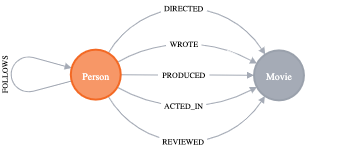

### Configure the Spark Environment

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.2/spark-3.2.2-bin-hadoop3.2.tgz

In [3]:
!tar xf spark-3.2.2-bin-hadoop3.2.tgz

In [4]:
!pip install -q findspark

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.2-bin-hadoop3.2"

In [6]:
import findspark
findspark.init()

In [10]:
neo4j_url = "" # put your neo4j url here

In [7]:
neo4j_user = "" # put your neo4j user here

In [8]:
neo4j_password = "" # put your neo4j password here

In [11]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder
        .master('local[*]')
        .appName('Leverage Neo4j with Apache Spark')
        .config('spark.ui.port', '4050')
        # Just to show dataframes as tables
        .config('spark.sql.repl.eagerEval.enabled', True)
        .config('spark.jars.packages', 'org.neo4j:neo4j-connector-apache-spark_2.12:4.1.3_for_spark_3,org.neo4j:neo4j-dwh-connector_2.12:1.0.0_for_spark_3,net.snowflake:spark-snowflake_2.12:2.10.1-spark_3.2,net.snowflake:snowflake-jdbc:3.13.22')
        # As we're using always the same database instance we'll
        # define them as global variables
        # so we don't need to repeat them each time
        .config("neo4j.url", neo4j_url)
        .config("neo4j.authentication.type", "basic")
        .config("neo4j.authentication.basic.username", neo4j_user)
        .config("neo4j.authentication.basic.password", neo4j_password)
        .getOrCreate())
spark


## Exercises prerequisite

In this notebook we'll let you do some exercises to test what you learned during this presentation. In some of them we user the Neo4j python driver in order to check if all the exercises are being solved properly

*Neo4j Python Driver is required only for verifying the exercises when you persist data from Spark to Neo4j*

**It's not required by the Spark connector!!!**

In [12]:
!pip install neo4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.5 MB/s 
  Created wheel for neo4j: filename=neo4j-4.4.6-py3-none-any.whl size=123403 sha256=8cb431333a556e518d462508235e9be64f654978b133a938f0eee1baae1ddfda
  Stored in directory: /root/.cache/pip/wheels/34/30/b5/3da327d55fe820a6b5a8ddfa2993dbc89b1b971f6ae7ed1147
Successfully built neo4j


In [13]:
from neo4j import GraphDatabase
neo4j_driver = GraphDatabase.driver(neo4j_url, auth=(neo4j_user, neo4j_password))

# Read data from Neo4j into Spark


The query above generates the following graph model:



## Read nodes via `labels` option

In [ ]:
movies_df = (spark.read
            .format('org.neo4j.spark.DataSource')
            .option('labels', ':Movie')
            .load())

### Schema description

In [ ]:
movies_df.printSchema()

The `movies_df` contains a set of fields, the first two (generally) are always:

* `<id>` which represents the internal Neo4j id
* `<labels>` which represents the list of labels attached to the node

All other properties are taken from the node via schema resolution by using APOC or Cypher queries

In [ ]:
movies_df

### Exercise

Read all the `Person` nodes store them into a Python variable called `person_df` and then verify the results

In [ ]:
person_df = # write your spark code here 

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 created the actors_df
"""

assert person_df.count() == 133
assert person_df.schema.fieldNames() == ['<id>', '<labels>', 'name', 'born']
assert person_df.collect()[0]["<labels>"] == ['Person']
print("All assertion are successfuly satisfied. Congrats you created your first DataFrame")

## Read relationships via `relationship` option

There are two way to transform relationships into DataFrame

* having all the node and relationship data flattened into the DataFrame
* having all the node properties in maps and the relationship data as columns

### DataFrame with flattened data

In [ ]:
actedin_df = (spark.read
            .format('org.neo4j.spark.DataSource')
            .option('relationship', 'ACTED_IN')
            .option('relationship.source.labels', ':Person')
            .option('relationship.target.labels', ':Movie')
            .load())

### Schema description

In [ ]:
actedin_df.printSchema()

The `movies_df` contains a set of fields, the first two (generally) are always:

* `<rel.id>` which represents the internal Neo4j relationship id
* `<rel.type>` which represents the relationship type
* `<source/target.id>` which represents the internal Neo4j node id
* `<source/target.labels>` which represents the list of labels attached to the node
* `rel.*` which represents the properties attached to the relationship
* `source/target.*` which represents the properties attached to the node

All other properties are taken from the node via schema resolution by using APOC or Cypher queries

In [ ]:
actedin_df

### DataFrame with nodes as map

In [ ]:
actedin_map_df = (spark.read
            .format('org.neo4j.spark.DataSource')
            .option('relationship.nodes.map', True)
            .option('relationship', 'ACTED_IN')
            .option('relationship.source.labels', ':Person')
            .option('relationship.target.labels', ':Movie')
            .load())

### Schema description

In [ ]:
actedin_map_df.printSchema()

The `movies_df` contains a set of fields, the first two (generally) are always:

* `<rel.id>` which represents the internal Neo4j relationship id
* `<rel.type>` which represents the relationship type
* `<source/target>` which represents a map with node values
* `rel.*` which represents the properties attached to the relationship

All other properties are taken from the node via schema resolution by using APOC or Cypher queries

In [ ]:
actedin_map_df

In [ ]:
actedin_map_df.collect()[0]["<source>"]

### Exercise

Read all the `DIRECTED` relationships

In [ ]:
directed_df = # write your spark code here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 created the directed_df
"""

assert directed_df.count() == 44
assert directed_df.schema.fieldNames() == ['<rel.id>',
 '<rel.type>',
 '<source.id>',
 '<source.labels>',
 'source.name',
 'source.born',
 '<target.id>',
 '<target.labels>',
 'target.title',
 'target.tagline',
 'target.released']
assert directed_df.collect()[0]["<rel.type>"] == 'DIRECTED'
print("All assertion are successfuly satisfied. Congrats you created your first relationship DataFrame")

## Read arbitrary data via Cypher query

In [ ]:
cypher_df = (spark.read
            .format('org.neo4j.spark.DataSource')
            .option('query', '''
              // Extend Tom Hanks co-actors, to find co-co-actors who haven't worked with Tom Hanks
              MATCH (tom:Person {name:"Tom Hanks"})-[:ACTED_IN]->(m)<-[:ACTED_IN]-(coActors),
                (coActors)-[:ACTED_IN]->(m2)<-[:ACTED_IN]-(cocoActors)
              WHERE NOT (tom)-[:ACTED_IN]->()<-[:ACTED_IN]-(cocoActors)
                AND tom <> cocoActors
              RETURN cocoActors.name AS Recommended, count(*) AS Strength
              ORDER BY Strength DESC
            ''')
            .load())

### Schema description

In [ ]:
cypher_df.printSchema()

In [ ]:
cypher_df

### Exercise

Return all the actors that have also directed a movie.

The returned DataFrame must have 3 columns:

* `name` the actor name
* `acted_in` a list of unique films (title) where he acted in
* `directed` a list of unique films (title) where he was a director

In [ ]:
your_cypher_df = # write your spark code here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 created the your_cypher_df
"""

assert your_cypher_df.count() == 5
assert your_cypher_df.schema.fieldNames() == ['name', 'acted_in', 'directed']
your_cypher_df_collect = your_cypher_df.collect()
assert frozenset(map(lambda row: row['name'], your_cypher_df_collect)) == frozenset(['Clint Eastwood',
 'Danny DeVito',
 'James Marshall',
 'Werner Herzog',
 'Tom Hanks'])
assert frozenset(map(lambda row: frozenset(row['acted_in']), your_cypher_df_collect)) == set([
      frozenset(["Apollo 13", "You've Got Mail", "A League of Their Own", "Joe Versus the Volcano", "That Thing You Do", "The Da Vinci Code", "Cloud Atlas", "Cast Away", "The Green Mile", "Sleepless in Seattle", "The Polar Express", "Charlie Wilson's War"]),
      frozenset(["What Dreams May Come"]),
      frozenset(["Unforgiven"]),
      frozenset(["A Few Good Men"]),
      frozenset(["Hoffa", "One Flew Over the Cuckoo's Nest"])
    ])
assert frozenset(map(lambda row: frozenset(row['directed']), your_cypher_df_collect)) == set([
      frozenset(["That Thing You Do"]),
      frozenset(["RescueDawn"]),
      frozenset(["Unforgiven"]),
      frozenset(["V for Vendetta", "Ninja Assassin"]),
      frozenset(["Hoffa"])
    ])
print("All assertion are successfuly satisfied. Congrats you created your first cypher dataframe")

# Write data from Spark to Neo4j

## The graph model

Our gol is to create this simple graph model

<img src="https://dist.neo4j.com/wp-content/uploads/developer-desktop-csv-import-data_model.svg" >

### Download The Dataset

In [ ]:
!wget -q https://s3.amazonaws.com/dev.assets.neo4j.com/wp-content/uploads/desktop-csv-import.zip

In [ ]:
!unzip desktop-csv-import.zip

### Explore the Dataset

In [ ]:
products_df = (spark.read
      .format('csv')
      .option('inferSchema', True)
      .option('path', '/content/desktop-csv-import/products.csv')
      .load())

In [ ]:
products_df.printSchema()

In [ ]:
products_df

In [ ]:
products_df = (products_df.withColumnRenamed('_c0', 'id')
      .withColumnRenamed('_c1', 'name')
      .withColumnRenamed('_c2', 'price'))

In [ ]:
products_df.printSchema()

In [ ]:
products_df

## Write nodes via `label` option

In [ ]:
(products_df.write
 .format('org.neo4j.spark.DataSource')
 .mode('append')
 .option('labels', ':Product')
 .save())

### Create Constraints

Oh but wait, we forgot to create constraints!!! if we go into the Neo4j browser and excute the following query:

```cypher
show constraints
```

We should get an empty result.

So please create the constaints for the node `Product`:

```cypher
CREATE CONSTRAINT product_id FOR (p:Product) REQUIRE p.id IS UNIQUE; 
```

But if you want, you can also delegate the Spark connector to perform optimizations pre-processing by usign the option `schema.optimization.type` which can assume three values:

* `INDEX`: it creates only indexes on provided nodes.
* `NODE_CONSTRAINTS`: it creates only indexes on provided nodes.

So let's create the `Order` node with by let the connector creating the constraints for you

In [ ]:
orders_df = (spark.read
      .format('csv')
      .option('inferSchema', True)
      .option('header', True)
      .option('path', '/content/desktop-csv-import/orders.csv')
      .load())

In [ ]:
orders_df.printSchema()

In [ ]:
orders_df

In [ ]:
# we cast orderDate to timestamp in order to have it converted properly into Neo4j
orders_df = orders_df.selectExpr('orderID AS id', 'CAST(orderDate AS TIMESTAMP) AS date', 'shipCountry')

In [ ]:
orders_df.printSchema()

In [ ]:
orders_df

In [ ]:
(orders_df.write
 .format('org.neo4j.spark.DataSource')
 .mode('overwrite')
 .option('labels', ':Order')
 .option('schema.optimization.type', 'NODE_CONSTRAINTS')
 # this is necessary in order to specify what is the constraint field
 .option('node.keys', 'id')
 .save())

Just to be sure that the constraints are properly created use the following query:

```cypher
show constraints
```

You should have something like this:

```bash
╒════╤═════════════════════════════════╤════════════╤════════════╤═══════════════╤════════════╤══════════════╕
│"id"│"name"                           │"type"      │"entityType"│"labelsOrTypes"│"properties"│"ownedIndexId"│
╞════╪═════════════════════════════════╪════════════╪════════════╪═══════════════╪════════════╪══════════════╡
│4   │"product_id"                     │"UNIQUENESS"│"NODE"      │["Product"]    │["id"]      │3             │
├────┼─────────────────────────────────┼────────────┼────────────┼───────────────┼────────────┼──────────────┤
│6   │"spark_NODE_CONSTRAINTS_Order_id"│"UNIQUENESS"│"NODE"      │["Order"]      │["id"]      │5             │
└────┴─────────────────────────────────┴────────────┴────────────┴───────────────┴────────────┴──────────────┘
```

**N.b.** if you want to check that the timestamp has correctly converted please run the following query:

```cypher
MATCH (n:Order) 
RETURN n.id, n.date, apoc.meta.type(n.date)
```

### Exercise

Given the `football_teams_df` and `football_player_df` below please:
* for `football_teams_df` insert it as nodes with label `:FootballTeam` in Neo4j.
* for `football_player_df` insert it as nodes with label `:FootballPlayer` in Neo4j.

Create for both of them constraints via the schema optimization feature:
* for `football_teams_df` the key must be the property `id`
* for `football_player_df` the key must be the property `name`

In [ ]:
football_teams_df = spark.createDataFrame([{'id': 1, 'name': 'AC Milan'}, {'id': 2, 'name': 'FC Internazionale'}])
football_player_df = spark.createDataFrame([
  {'name': 'Zlatan Ibrahimovic'},
  {'name': 'Sandro Tonali'},
  {'name': 'Nicolò Barella'},
  {'name': 'Marcelo Brozovic'}])

In [ ]:
# write your spark code that persist football_teams_df and football_player_df here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 persisted football_teams_df and 
 football_player_df in Neo4j as nodes
"""  

with neo4j_driver.session() as session:
  # count football players
  football_players = session.read_transaction(lambda tx: (tx.run('''
      MATCH (p:FootballPlayer)
      WHERE p.name IN ['Zlatan Ibrahimovic', 'Sandro Tonali',
        'Nicolò Barella', 'Marcelo Brozovic']
      RETURN count(p) AS count
    ''').single()['count']))
  assert football_players == 4

  # count football teams
  football_teams = session.read_transaction(lambda tx: (tx.run('''
      MATCH (p:FootballTeam)
      WHERE p.name IN ['AC Milan', 'FC Internazionale']
      RETURN count(p) AS count
    ''').single()['count']))
  assert football_teams == 2

  # count constraints
  football_constraints = session.read_transaction(lambda tx: (tx.run('''
      SHOW CONSTRAINTS YIELD name
      WHERE name IN ['spark_NODE_CONSTRAINTS_FootballPlayer_name', 'spark_NODE_CONSTRAINTS_FootballTeam_id']
      RETURN count(*) AS count
    ''').single()['count']))
  assert football_constraints == 2

print("All assertion are successfuly satisfied. Congrats you saved your first Node DataFrame into Neo4j!")

## Write relationships via `relationship` option

In [ ]:
order_details_df = (spark.read
      .format('csv')
      .option('inferSchema', True)
      .option('header', True)
      .option('path', '/content/desktop-csv-import/order-details.csv')
      .load())

In [ ]:
order_details_df.printSchema()

In [ ]:
order_details_df

Please remember that this is the pattern that we want to ingest:


<img src="https://dist.neo4j.com/wp-content/uploads/developer-desktop-csv-import-data_model.svg" >

In [ ]:
(order_details_df.write
 .format('org.neo4j.spark.DataSource')
 .mode('overwrite')
 .option('relationship', 'CONTAINS')
 .option('relationship.save.strategy', 'keys')
 .option('relationship.source.labels', ':Product')
 .option('relationship.source.save.mode', 'Match')
 .option('relationship.source.node.keys', 'productID:id')
 .option('relationship.target.labels', ':Order')
 .option('relationship.target.save.mode', 'Match')
 .option('relationship.target.node.keys', 'orderID:id')
 .option('relationship.properties', 'quantity:quantityOrdered')
 .save())

### Exercise

Given the `team_player_df` create a relationship between `:FootballPlayer` and `:FootballTeam` of type `PLAYS_FOR`:

```cypher
(:FootballPlayer)-[:PLAYS_FOR]->(:FootballTeam)
```

In [ ]:
team_player_df = spark.createDataFrame([
  {'id': 1, 'football_player': 'Zlatan Ibrahimovic'},
  {'id': 1, 'football_player': 'Sandro Tonali'},
  {'id': 2, 'football_player': 'Nicolò Barella'},
  {'id': 2, 'football_player': 'Marcelo Brozovic'}])

In [ ]:
# write your spark code that persist team_player_df here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 persisted team_player_df as relationships
"""  

with neo4j_driver.session() as session:
  # count relationships
  def count_relationships(tx):
    result = tx.run('''
      MATCH (p:FootballPlayer)-[:PLAYS_FOR]->(t:FootballTeam)
      RETURN t.name AS team, collect(p.name) AS players
      ORDER by team
    ''')
    return [{'team': record['team'], 'players': set(record['players'])} for record in result]

  actual = session.read_transaction(count_relationships)
  expected = [
    {'team': 'AC Milan', 'players': frozenset(['Zlatan Ibrahimovic', 'Sandro Tonali'])},
    {'team': 'FC Internazionale', 'players': frozenset(['Nicolò Barella', 'Marcelo Brozovic'])}
  ]
  assert actual == expected

print("All assertion are successfuly satisfied. Congrats you saved your first Relationship DataFrame into Neo4j!")

## Write custom graphs via Cypher Query

Now lets consider that two actors created an order and bought several products, and we want to add information in our database.

In [ ]:
actor_orders = [
  {'actor_name': 'Cuba Gooding Jr.', 'order_id': 1, 'products': [11, 42,72], 'quantities': [1, 2, 3], 'order_date': '2022-06-07 00:00:00'},
  {'actor_name': 'Tom Hanks', 'order_id': 2, 'products': [24, 55, 75], 'quantities': [3, 2, 1], 'order_date': '2022-06-06 00:00:00'}
]

actor_orders_df = spark.createDataFrame(actor_orders)

In [ ]:
actor_orders_df.printSchema()

In [ ]:
actor_orders_df

In this case please go into Neo4j and create the following constraint:

```cypher
CREATE CONSTRAINT person_name FOR (p:Person) REQUIRE p.name is UNIQUE;
```

In [ ]:
(actor_orders_df.write
 .format('org.neo4j.spark.DataSource')
 .mode('overwrite')
 .option('query', '''
  MATCH (person:Person {name: event.actor_name})
  CREATE (order:Order {id: event.order_id, date: datetime(replace(event.order_date, ' ', 'T'))})
  MERGE (person)-[:CREATED]->(order)
  WITH event, order
  UNWIND range(0, size(event.products) - 1) AS index
  MATCH (product:Product {id: event.products[index]})
  MERGE (product)-[:CONTAINS{quantityOrdered: event.quantities[index]}]->(order)
 ''')
 .save())

### Exercise

Given `neo4j_resources_df` build a small Knowledge Graph in Neo4j with the following structure:

```cypher
(:Author{name})-[:CREATED]->(:Resource{name})-[:HAS_TAG]->(:Tag{name})
```

In [ ]:
neo4j_resources_df = spark.createDataFrame([
    {'author': 'LARUS Business Automation', 'resource': 'Galileo.XAI', 'tags': ['Graph Machine Learning', 'Neo4j', 'Explainable AI', 'Artificial Intelligence']},
    {'author': 'Neo4j', 'resource': 'Graph Data Science Library', 'tags': ['Graph Machine Learning', 'Algorithms']},
    {'author': 'Michael Hunger', 'resource': 'APOC', 'tags': ['Graph Data Integration', 'Graph Algorithms']}
])

In [ ]:
neo4j_resources_df

In [ ]:
# write your spark code that persist neo4j_resources_df here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 persisted neo4j_resources_df as Cypher query
"""  

with neo4j_driver.session() as session:
  # count relationships
  def check_graph_consistency(tx):
    result = tx.run('''
      MATCH (a:Author)-[:CREATED]->(r:Resource)-[:HAS_TAG]->(t:Tag)
      RETURN a.name AS author, r.name AS resource, collect(t.name) AS tags
      ORDER By author
    ''')
    return [{'author': record['author'], 'resource': record['resource'], 'tags': set(record['tags'])} for record in result]

  actual = session.read_transaction(check_graph_consistency)
  expected = [
    {'author': 'LARUS Business Automation', 'resource': 'Galileo.XAI', 'tags': frozenset(['Graph Machine Learning', 'Neo4j', 'Explainable AI', 'Artificial Intelligence'])},
    {'author': 'Michael Hunger', 'resource': 'APOC', 'tags': frozenset(['Graph Data Integration', 'Graph Algorithms'])},
    {'author': 'Neo4j', 'resource': 'Graph Data Science Library', 'tags': frozenset(['Graph Machine Learning', 'Algorithms'])}
  ]
  assert actual == expected

print("All assertion are successfuly satisfied. Congrats you saved your first Knowledge Graph DataFrame into Neo4j!")

# Pyspark Pandas

## Import the library

The first thing to do is import the library!

In [ ]:
import pyspark.pandas as ps

## From Neo4j to PySpark Pandas

### Import Neo4j data into pyspark pandas

We'll show how to import data from Neo4j into PySpark pandas

Geneally speaking we'll invoke the `Pandas.read_spark_io` method in this general way:

```python
import pyspark.pandas as ps
pandas = ps.read_spark_io(format = "org.neo4j.spark.DataSource", options = <Python Dictionary>)
```

N.b. The `options` field is a set of options values that are the same values that we need from pyspark, ie:

The follwing pyspark job that reads data from Neo4j:

```python
df = spark.read
    .format("org.neo4j.spark.DataSource")
    .option("url", url)
    .option("authentication.basic.username", user)
    .option("authentication.basic.password", password)
    .option("labels", "Test")
```

### Import Neo4j nodes into pyspark pandas


In [ ]:
person_pd = ps.read_spark_io(format="org.neo4j.spark.DataSource", options={"labels": "Person"})

In [ ]:
person_pd

In [ ]:
# now we can describe it
person_pd.describe()

In [ ]:
# we can limit it
person_pd.head(10)

In [ ]:
# we can check for data types as well
person_pd.dtypes

In [ ]:
# we can convert it to Numpy instance
person_pd.head(10).to_numpy()

In [ ]:
# we can also show just one column
person_pd.name.head(10)

In [ ]:
person_pd.count()['<id>']

#### Exercise

Load a pandas DataFrame from nodes with label `Movie`

In [ ]:
movies_pd = # put your Python code here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 created movies_pd
"""  

assert str(type(movies_pd)) == '<class \'pyspark.pandas.frame.DataFrame\'>'
assert movies_pd.count()['<id>'] == 38
assert movies_pd.count()['tagline'] == 37
print("All assertion are successfuly satisfied. Congrats you created your first Neo4j node pandas!")

### Import Neo4j relationships into pyspark pandas

In [ ]:
directed_pd = ps.read_spark_io(format="org.neo4j.spark.DataSource", options={
    "relationship": "DIRECTED",
    "relationship.source.labels": "Person",
    "relationship.target.labels": "Movie"})

In [ ]:
directed_pd

#### Exercise

Load into `actedin_pd` the relationship `ACTED_IN`

In [ ]:
actedin_dp = # put your Python code here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 created actedin_dp
"""  

assert str(type(actedin_dp)) == '<class \'pyspark.pandas.frame.DataFrame\'>'
assert actedin_dp.count()['<rel.id>'] == 172
assert actedin_dp.count()['rel.roles'] == 172
print("All assertion are successfuly satisfied. Congrats you created your first Neo4j relationship pandas!")

### Import data into pyspark pandas via custom Cypher query


As for Spark DataFrames you can also leverage Cypher queries to bring data inside a pandas with this very simple approach

In [ ]:
cypher_pd = ps.read_spark_io(format="org.neo4j.spark.DataSource", options={
    'query': '''
              // Extend Tom Hanks co-actors, to find co-co-actors who haven't worked with Tom Hanks
              MATCH (tom:Person {name:"Tom Hanks"})-[:ACTED_IN]->(m)<-[:ACTED_IN]-(coActors),
                (coActors)-[:ACTED_IN]->(m2)<-[:ACTED_IN]-(cocoActors)
              WHERE NOT (tom)-[:ACTED_IN]->()<-[:ACTED_IN]-(cocoActors)
                AND tom <> cocoActors
              RETURN cocoActors.name AS Recommended, count(*) AS Strength ORDER BY Strength DESC
            '''})

In [ ]:
cypher_pd.head(10)

#### Exercise

Create a pyspark pandas that extracts, for each actor, the number of films that he acted in.
The pandas DataFrame must have two columns:

* `actor` the actor name
* `films` the aggregate count of films that he acted in

In [ ]:
custom_cypher_pd = # put your Python code here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 created custom_cypher_pd
"""  

assert str(type(custom_cypher_pd)) == '<class \'pyspark.pandas.frame.DataFrame\'>'
assert custom_cypher_pd.count()['actor'] == 102
assert custom_cypher_pd.count()['films'] == 102
print("All assertion are successfuly satisfied. Congrats you created your first Neo4j Cypher pandas!")

## From Pandas to Neo4j

### Import Python Pandas Library

In [ ]:
import pandas as pd

### Import Pandas into Neo4j

We'll show how to import data from Pandas to Neo4j via Spark

Geneally speaking we'll invoke the `Pandas.read_spark_io` method in this general way:

```python
import pyspark.pandas as ps
df.spark.to_spark_io(mode = "overwrite", format = "org.neo4j.spark.DataSource", options = {<Python Dictionar>})
```

N.b. The `options` field is a set of options values that are the same values that we need from pyspark, ie:

The follwing pyspark job that writes data from Spark to Neo4j:

```python
df.write
 .format('org.neo4j.spark.DataSource')
 .mode('overwrite')
 .option('labels', ':Order')
 .option('schema.optimization.type', 'NODE_CONSTRAINTS')
 # this is necessary in order to specify what is the constraint field
 .option('node.keys', 'id')
 .save()
```


### Import Pandas as Neo4j nodes

In [ ]:
# Create the pandas DataFrame 
person_to_import_pd = pd.DataFrame([['Andrea Santurbano', 37], ['Mauro Roiter', 35], ['Giuseppe Villani', 33]],
                        columns=['name', 'age']) 

In [ ]:
# Transaform it to PySpark Pandas
person_to_import_pd = ps.DataFrame(person_to_import_pd)

In [ ]:
person_to_import_pd

In [ ]:
# Import it in Neo4j
person_to_import_pd.spark.to_spark_io(mode = "append", format = "org.neo4j.spark.DataSource", options = {'labels': 'Person'})

#### Exercise

Insert `products_to_import_pd` as `Product` node by using PySpark Pandas API

In [ ]:
products_to_import_pd = pd.DataFrame([[78, 'Nutella', 4.0], [79, 'Cornetto Algida', 2.3]],
                        columns=['id', 'name', 'price'])

In [ ]:
products_to_import_pd

In [ ]:
# write you PySpark Pandas code here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 persisted products_to_import_pd
"""

with neo4j_driver.session() as session:
  # check for new products
  def check_for_new_products(tx):
    result = tx.run('''
      MATCH (p:Product)
      WHERE p.id IN [78, 79]
      RETURN p.id AS id, p.name AS name, p.price AS price
      ORDER BY id
    ''')
    return [{'id': record['id'], 'name': record['name'], 'price': record['price']} for record in result]

  actual = session.read_transaction(check_for_new_products)
  expected = [
    {'id': 78, 'name': 'Nutella', 'price': 4.0},
    {'id': 79, 'name': 'Cornetto Algida', 'price': 2.3}
  ]
  assert actual == expected

print("All assertion are successfuly satisfied. Congrats you persisted your first Neo4j Node pandas!")

### Import Pandas as Neo4j nelationships

In [ ]:
# Create the pandas DataFrame 
person_watched_film_pd = pd.DataFrame([['Mauro Roiter', 'The Matrix'], ['Giuseppe Villani', 'The Matrix']],
                        columns=['name', 'film'])

In [ ]:
# Transaform it to PySpark Pandas
person_watched_film_pd = ps.DataFrame(person_watched_film_pd)

In [ ]:
# Transaform it to PySpark Pandas
person_watched_film_pd

In [ ]:
person_watched_film_pd.spark.to_spark_io(mode = "append", format = "org.neo4j.spark.DataSource", options = {
  'relationship': 'WATCHED',
  'relationship.save.strategy': 'keys',
  'relationship.source.labels': ':Person',
  'relationship.source.save.mode': 'Match',
  'relationship.source.node.keys': 'name',
  'relationship.target.labels': ':Movie',
  'relationship.target.save.mode': 'Match',
  'relationship.target.node.keys': 'film:title'
})

#### Exercise

Insert `person_watched_film_pd_new` as `WATCHED` relationships by using PySpark Pandas API. In this case add the column `when` as relationship property `when`

In [ ]:
person_watched_film_pd_new = pd.DataFrame([['Andrea Santurbano', 'The Matrix', 1999], ['Andrea Santurbano', 'Cloud Atlas', 2012]],
                        columns=['name', 'film', 'when'])

In [ ]:
person_watched_film_pd_new

In [ ]:
# write you PySpark Pandas code here

In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 persisted person_watched_film_pd_new
"""

with neo4j_driver.session() as session:
  # check for new products
  def check_for_new_products(tx):
    result = tx.run('''
      MATCH (p:Person{name: 'Andrea Santurbano'})-[w:WATCHED]->(m:Movie)
      WHERE w.when IS NOT NULL
      RETURN p.name AS name, collect(m.title) AS movies
    ''')
    return [{'name': record['name'], 'movies': set(record['movies'])} for record in result]

  actual = session.read_transaction(check_for_new_products)
  expected = [
    {'name': 'Andrea Santurbano', 'movies': set(['The Matrix', 'Cloud Atlas'])}
  ]
  assert actual == expected

print("All assertion are successfuly satisfied. Congrats you persisted your first Neo4j Relationship pandas!")

## Import Pandas via Neo4j Cypher query

In [ ]:
person_contribute_to_pd = pd.DataFrame([['Mauro Roiter', ['Neo4j ETL', 'Neo4j APOC', 'Kafka/Spark 2nd level Support']],
                                          ['Giuseppe Villani', ['Neo4j ETL', 'Neo4j APOC', 'Neo4j Streams']]],
                        columns=['name', 'contributed'])

In [ ]:
person_contribute_to_pd = ps.DataFrame(person_contribute_to_pd)

In [ ]:
person_contribute_to_pd

In [ ]:
person_contribute_to_pd.spark.to_spark_io(format = 'org.neo4j.spark.DataSource', options = {
  'query': '''
    MATCH (person:Person {name: event.name})
    UNWIND event.contributed AS project 
    MERGE (prj:Project {name: project})
    CREATE (person)-[:CONTRIBUTED]->(prj)
  '''
})

#### Exercise

Given the `person_follows_pd` please persist it as:

```cypher
(:Person)-[:FOLLOWS{socialNetwork}]-(:Person)
```

In [ ]:
person_follows_pd = pd.DataFrame([['Mauro Roiter', [{'name': 'Andrea Santurbano', 'social': 'Twitter'}, {'name': 'Giuseppe Villani', 'social': 'Instagram'}]]],
                        columns=['name', 'follows'])
person_follows_pd

In [ ]:
person_follows_pd = ps.DataFrame(person_follows_pd)
person_follows_pd

In [ ]:
# write you PySpark Pandas code here


In [ ]:
"""
 This paragraph is for validating the code the you
 wrote above, please execute it after you 
 persisted person_follows_pd
"""

with neo4j_driver.session() as session:
  # check for new products
  def check_for_new_products(tx):
    result = tx.run('''
      MATCH (p:Person{name: 'Mauro Roiter'})-[f:FOLLOWS]->(pp:Person)
      WHERE f.social IN ['Twitter', 'Instagram']
      RETURN p.name AS name, collect(pp.name) AS follows
    ''')
    return [{'name': record['name'], 'follows': set(record['follows'])} for record in result]

  actual = session.read_transaction(check_for_new_products)
  expected = [
    {'name': 'Mauro Roiter', 'follows': set(['Andrea Santurbano', 'Giuseppe Villani'])}
  ]
  assert actual == expected

print("All assertion are successfuly satisfied. Congrats you persisted your first Neo4j Cypher pandas!")

# Data Warehouse Connector

The goal of the Neo4j DWH Connector is to simplify the interoperability between Neo4j Spark and other data sources like Snowflake, Redshift and so on.

The Neo4j DWH Connector provides an easy way in order move data between Neo4j and popular Data Warehouses like:

* Snowflake
* BigQuery
* Redshift
* Azure Synapse

You can you use it in two ways:

As Spark Submit Job by providing a JSON configuration that abstracts a Spark Job which moves data from one data source to another
As Scala/Python API in order to simplify writing a Spark Job that moves the dat from a database to another.

More info about the DWH Connector [here](https://github.com/neo4j-contrib/neo4j-dwh-connector)


In [21]:
 # put your Snowflake credentials here
snowflake_user = ""
snowflake_password = ""
snowflake_uri = ""

In [13]:
from neo4j_dwh_connector import *

## From Snowflake to Spark

In [22]:
source = Source(
    format="snowflake",  # the source database (mandatory)
    # the configuration options it will change for every source database (mandatory)
    options={
        "sfSchema": "TPCH_SF1",
        "sfPassword": snowflake_password,
        "sfUser": snowflake_user,
        "dbtable": "CUSTOMER",
        "sfDatabase": "SNOWFLAKE_SAMPLE_DATA",
        "sfURL": snowflake_uri
    },
    # a list of selected projected columns, it can be useful in order to eventually cast data,
    # apply Spark's UDFs and minimize the data movement from the source database (optional)
    columns=[
        Column(name="CAST(C_ACCTBAL AS DOUBLE)", alias="C_ACCTBAL"),
        Column(name="C_ADDRESS"),
        Column(name="C_COMMENT"),
        Column(name="CAST(C_CUSTKEY AS LONG)", alias="C_CUSTKEY"),
        Column(name="C_MKTSEGMENT"),
        Column(name="C_NAME"),
        Column(name="CAST(C_NATIONKEY AS LONG)", alias="C_NATIONKEY"),
        Column(name="C_PHONE")
    ],
    where="",  # a filter for the source dataset (optional)
    printSchema=True,  # if you want to print the schema, useful for debug purposes (optional)
    show=5,  # if you want show the source database, useful for debug purposes (optional)
    limit=10,  # the amount of rows that you want to have from the source dataset (optional)
    # a dataframe partition configuration (optional)
    partition=Partition(
        number=-1,  # the number of partions mandatory if you want to define partitions
        by=""  # the field to partition (optional)
    )
)
# the target database configuration
target = Target(
    format="org.neo4j.spark.DataSource",  # the target database (mandatory)
    # the configuration options it will change for every source database (mandatory)
    options={
        "labels": ":Customer:FromSnowflake",
        "node.keys": "C_CUSTKEY"
    },
    mode="Overwrite"
)

config = JobConfig(
    name="The name of the Spark Job",
    conf={},  # a <String,String> configuration dict, every k/v binding will be insert as Spark Configuration
    hadoopConfiguration={},
    # a <String,String> configuration dict, every k/v binding will be insert as Hadoop Configuration
    source=source,
    target=target
)

connector = Neo4jDWHConnector(spark, config)

# this will ingest the data from source to target database
connector.run()